In [1]:
from habitat_dataset import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import quaternion
import math

In [77]:
def rotate_around_point_highperf(xy, radians, origin=(0, 0)):
    """Rotate a point around a given point.
    
    I call this the "high performance" version since we're caching some
    values that are needed >1 time. It's less readable than the previous
    function but it's faster.
    """
    x, y = xy
    offset_x, offset_y = origin
    adjusted_x = (x - offset_x)
    adjusted_y = (y - offset_y)
    cos_rad = math.cos(radians)
    sin_rad = math.sin(radians)
    qx = offset_x + cos_rad * adjusted_x + sin_rad * adjusted_y
    qy = offset_y + -sin_rad * adjusted_x + cos_rad * adjusted_y

    return qx, qy

In [116]:
def rotate_origin_only(xy, radians):
    """Only rotate a point around the origin (0, 0)."""
    x, y = xy
    xx = x * math.cos(radians) + y * math.sin(radians)
    yy = -x * math.sin(radians) + y * math.cos(radians)

    return xx, yy

0.4738533232125232


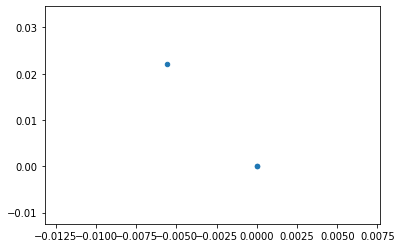

In [238]:
xy = centered[:3]
rot = quaternion.quaternion(*episode.rotations[0]).angle()
print(rot)
plt.scatter(*np.stack(rotate_around_point_highperf(xy.T, rot), axis=1).T, s=20)
axes = plt.gca()
axes.set_xlim([-0.5,0.5])
axes.set_ylim([-0.5,0.5]);

In [2]:
episode.positions[0, [0,1]], episode.start_position[:2], episode.start_rotation#[[0,2]]

NameError: name 'episode' is not defined

In [5]:
episode = HabitatDataset('test/train/000001')
episode[3]

(tensor([[[110.,  98.,  77.],
          [113., 101.,  79.],
          [121., 109.,  88.],
          ...,
          [169., 142., 120.],
          [169., 142., 119.],
          [163., 135., 111.]],
 
         [[119., 107.,  84.],
          [113., 101.,  80.],
          [127., 114.,  93.],
          ...,
          [171., 144., 122.],
          [179., 154., 136.],
          [179., 154., 136.]],
 
         [[ 87.,  69.,  61.],
          [ 87.,  69.,  61.],
          [ 97.,  82.,  69.],
          ...,
          [178., 153., 135.],
          [179., 154., 136.],
          [182., 158., 137.]],
 
         ...,
 
         [[ 72.,  58.,  55.],
          [ 71.,  59.,  56.],
          [ 71.,  59.,  56.],
          ...,
          [124., 111., 102.],
          [120., 107.,  98.],
          [119., 106.,  97.]],
 
         [[ 70.,  57.,  54.],
          [ 69.,  57.,  55.],
          [ 69.,  57.,  55.],
          ...,
          [125., 112., 103.],
          [125., 112., 103.],
          [120., 107.,  98.

In [3]:
for ep_dir in Path('test/train').glob('00*'):
    episode = HabitatDataset(ep_dir)
#     print(episode.start_position[:2])
    print(episode.positions[:,:2])
#     print(episode.end_position[:2])
#     print(np.linalg.norm(episode.positions[-1,:2] - episode.end_position[:2].numpy()))
#     print(episode.rotations[:,[0,2]])

tensor([[-1.5861,  0.2238],
        [-1.5861,  0.2238],
        [-1.5861,  0.2238],
        [-1.3454,  0.2083],
        [-1.3454,  0.2083],
        [-1.0967,  0.2068],
        [-0.8479,  0.2070],
        [-0.5992,  0.2073],
        [-0.3505,  0.2061],
        [-0.1017,  0.2099],
        [ 0.1470,  0.2099],
        [ 0.3958,  0.2099],
        [ 0.6445,  0.2099],
        [ 0.8933,  0.2099],
        [ 1.1420,  0.2099],
        [ 1.3908,  0.2099],
        [ 1.6395,  0.2099],
        [ 1.8883,  0.2099],
        [ 2.1370,  0.2099],
        [ 2.3858,  0.2099],
        [ 2.6345,  0.2099],
        [ 2.6345,  0.2099],
        [ 2.8751,  0.2099],
        [ 3.1158,  0.2099],
        [ 3.3564,  0.2099],
        [ 3.3564,  0.2099],
        [ 3.3564,  0.2099],
        [ 3.3564,  0.2099],
        [ 3.5309,  0.2099],
        [ 3.7053,  0.2099],
        [ 3.8798,  0.2099],
        [ 4.0543,  0.2099],
        [ 4.2288,  0.2099],
        [ 4.4032,  0.2099]])
tensor([[ 0.6956,  0.0099],
        [ 0.6956,  

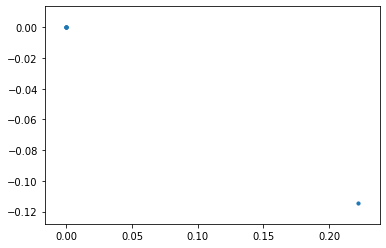

In [253]:
for ep_dir in list(Path('test/train').glob('00*'))[2:3]:
    episode = HabitatDataset(ep_dir)
    xy = episode.positions[:,[0,1]]
    centered = xy - xy[0]
#     print(episode.start_position[:2], xy[0])
    plt.scatter(*np.stack(rotate_around_point_highperf(centered[:5].T, rot), axis=1).T, s=10)

# axes = plt.gca()
# axes.set_xlim([-0.25, 0.25])
# axes.set_ylim([-0.25, 0.25]);